<a href="https://colab.research.google.com/github/Javier-Alfonso-DS/S04_T02_Visualitzacio_grafica_de_Multiples_variables/blob/main/S04_T02_Visualitzacio_grafica_de_Multiples_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descripció

Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.
Nivell 1

- Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

Nivell 2

- Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

Nivell 3

- Exercici 3

En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.


#  Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [225]:
# Montamos Google Drive para tener acceso a los datos
from google.colab import drive
drive.mount('/content/drive/')
#cd a subdirectorio Data.
%cd /content/drive/My\ Drive/Data 
#%ls #dir para visualizar los ficheros del subdirectorio. (Se pueden usar comandos unix)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data


In [226]:
# Actualización de librería pandas y matplotlib en entorno Colab.
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px


print(np.__version__)
print(pd.__version__)
print(mp.__version__)
print(sns.__version__)
print(plotly.__version__)
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade plotly

print(np.__version__)
print(pd.__version__)
print(mp.__version__)
print(sns.__version__)
print(plotly.__version__)

# !pip install pycaret
# import pycaret as py
# print(pycaret.__version__)

1.21.4
1.3.4
3.5.0
0.11.2
5.4.0
1.21.4
1.3.4
3.5.0
0.11.2
5.4.0


In [227]:
#Loading the dataset
tips = sns.load_dataset('tips')

The tips data set is a simple dataset that consists of observations on tip providers in restaurants. The data consists of the following features :

   * total_bill: The total bill paid by the customer.
   * tip: The tip provided by the customer.
   * sex: The gender of the customer.
   * smoker: If the customer is a smoker or not.
   * day: The day of the week when the observation was made.
   * time: The time of the observation, whether at lunch or dinner etc.
   * size: The size of the group whether there were multiple members.

Here is what the dataset looks like:


## Ejercicio Practico -- Scatter Plots

Scatter Plots o Gráficos de Puntos pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales.

Usaremos el dataset tips, selecionaremos unas cuantas variables.


In [228]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [229]:
tips.shape

(244, 7)

In [230]:
tips.ndim

2

In [231]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [232]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [233]:
# Aquí calculamos una nueva columna 'tip_pct' que indica el % de propina respecto a la factura total.
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


In [234]:
print("La propina media es de : ",round(tips['tip_pct'].mean(),2))

La propina media es de :  20.21


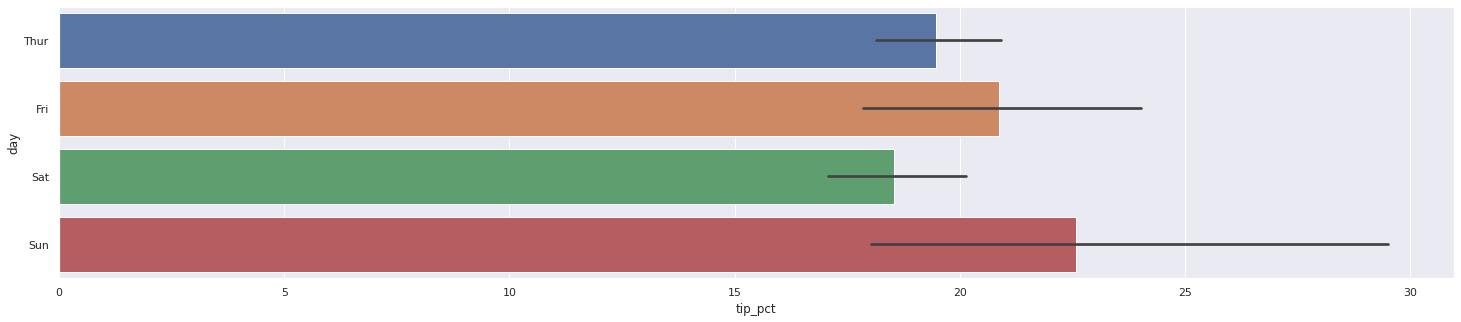

In [235]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

Aquí observamos que las mayores propinas se dan en domingo.

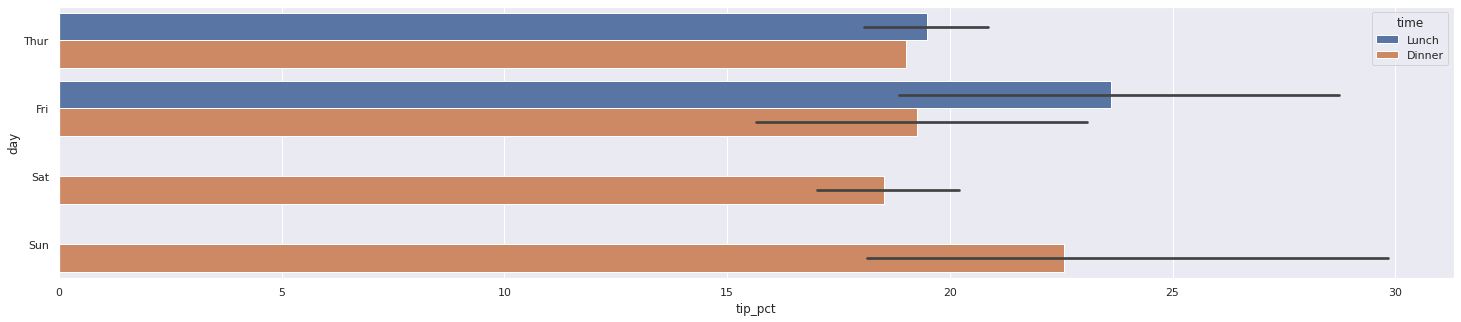

In [236]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

Aquí observamos que donde se dan mayor porcentaje de propina es en las comidas del Viernes y las cenas del Domingo.

In [237]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [238]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


Aquí hacemos el redondeo a 3 decimales y observamos también las variables categóricas. Por lo que detectamos que de 244 observaciones, 157 son Hombres, 151 son No fumadores y que la observación más frecuente es Sábado y/o hora de comer.

In [239]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

Aquí observamos que no hay valores nulos en ninguna columna.

In [240]:
print(round((tips['tip']).describe(), 3))
tips[tips['tip']==10]

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64


,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.0,Male,Yes,Sat,Dinner,3,24.5


Aquí observamos que la media de la propina es de unos 3 dólares y que el 50% de las propinas están entre 2 y 3'5.

La propina máxima fue de 10 dólares, que correspondió a una cena de 3 personas que costó unos 51 dólares, por lo que un porcentaje del 20% ya nos da estos 10 dólares.

In [241]:
#(tips['tip']).median().round(3)
# Cambiamos la sintaxi de esta instrucción:
round(tips['tip'].median(),3)

2.9

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


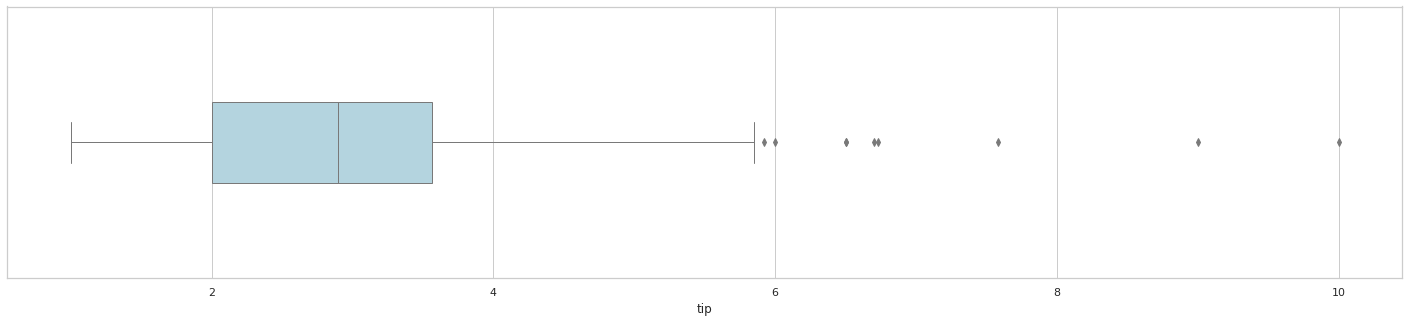

In [242]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

Aquí vemos como la distribución del valor de propina está entre 2 y 3,5 y que los valores de 6,8 y 10 son valores excepcionales.

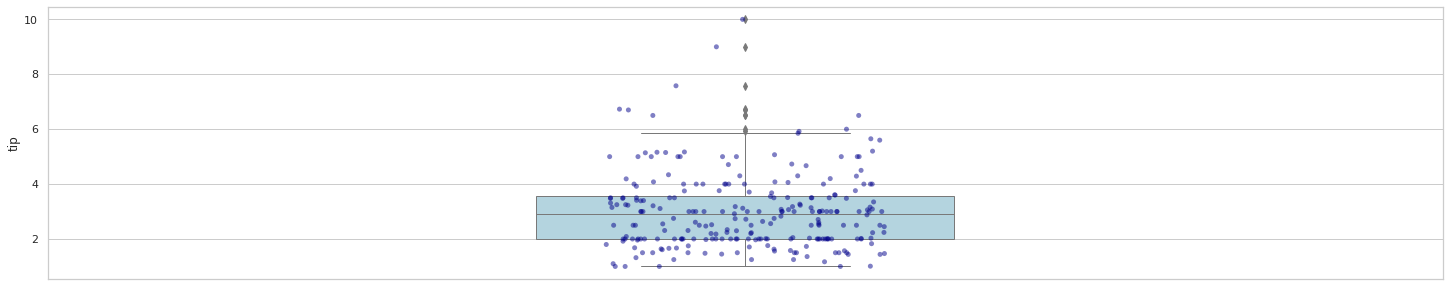

In [243]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

## Una Variable: 1 Numérica = 'tip_pct'

In [244]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
tip_pct        float64
dtype: object

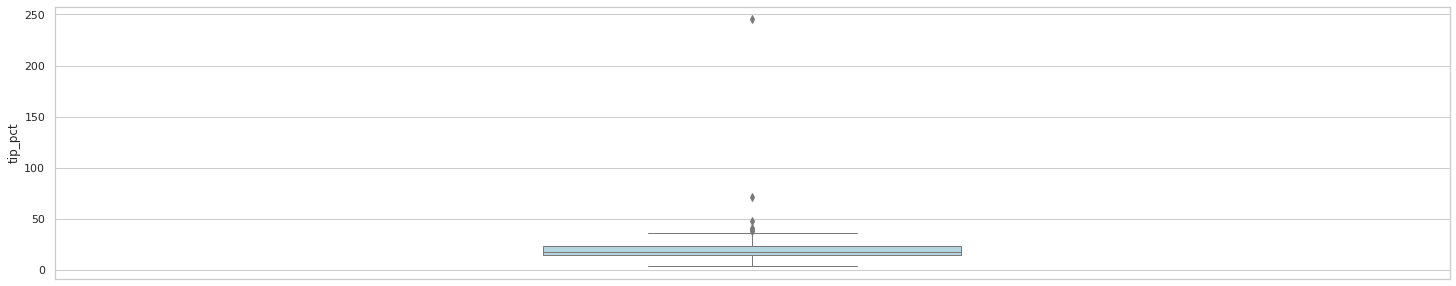

In [245]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

Aquí mostramos el boxplot de la variable % de propina, vemos que está sobre el valor 10, y que hay un valor extraño sobre los 250%. Vamos a observarlo.

In [246]:
tips["tip_pct"].describe()
tips[tips["tip_pct"]==max(tips["tip_pct"])]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,245.24


Vemos que es una persona que tuvo una factura de sólo 2.10 dólares y dejó una propina de 5, una anomalía, que quizás mejor quitar para graficar el boxplot anterior.

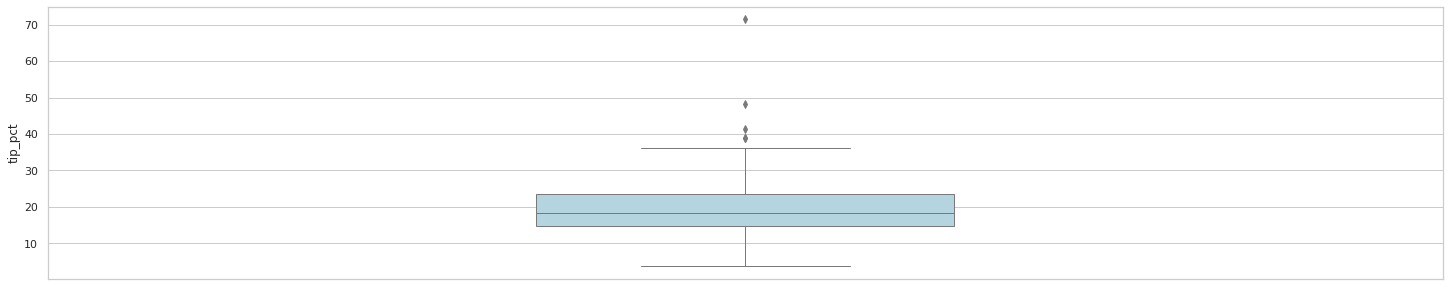

In [247]:
tips_wf = tips.copy()
a = tips_wf[tips["tip_pct"]==max(tips["tip_pct"])].index
tips_wf.drop(index=a,inplace=True)
sns.boxplot(y="tip_pct", data=tips_wf[tips_wf.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);


Si, queda algo más claro así.

## Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'

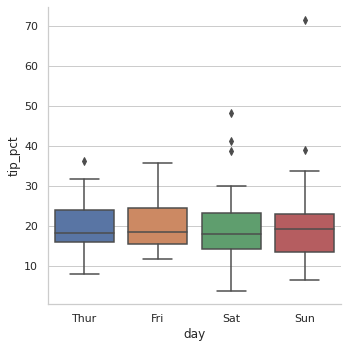

In [248]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

Aquí se hace el category plot del % de propina, quitando el valor de 245 ("outlayer") que deforma el gráfico.

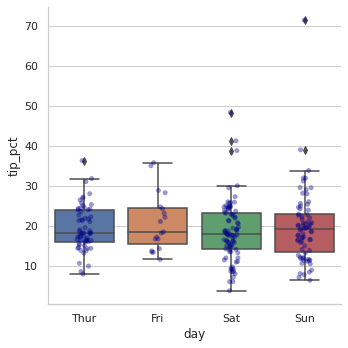

In [249]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Aquí se superpone el catplot con el stripplot, para ver un poco la distribución de las muestras.

## Tres Variables : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

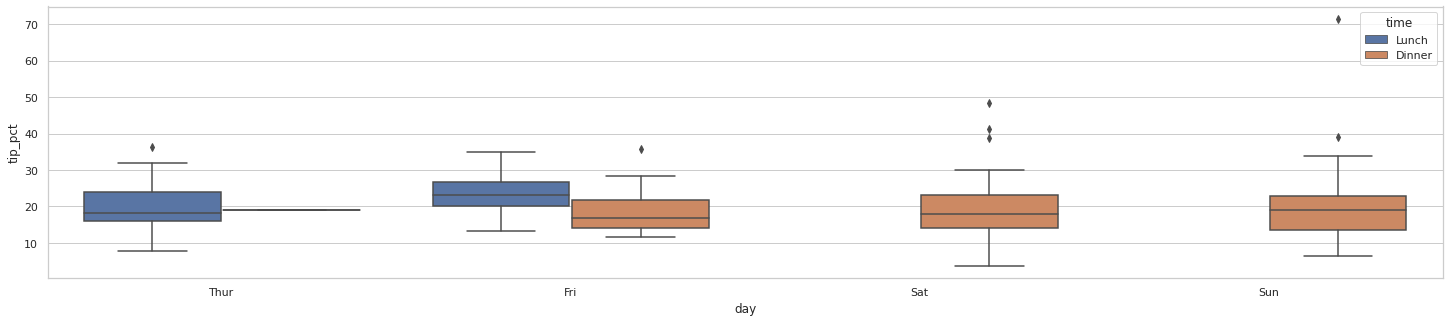

In [250]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

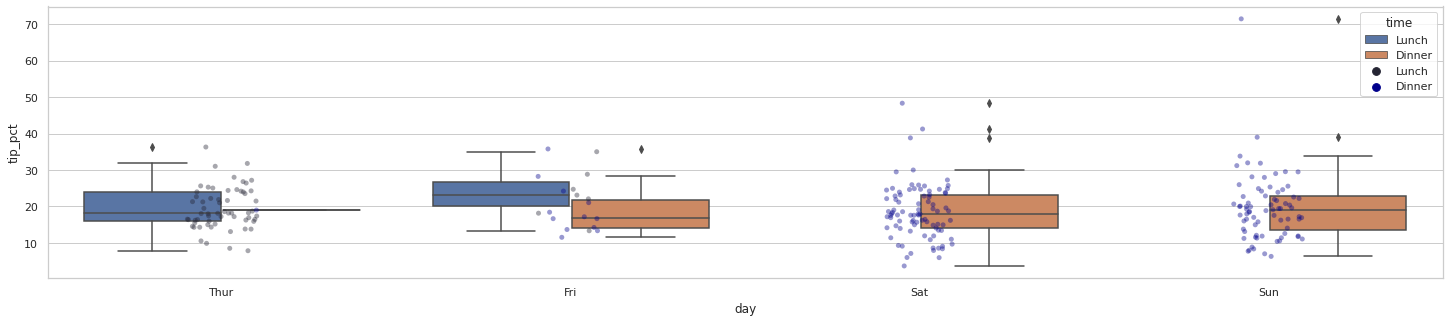

In [251]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Aquí se observa que se dejan más % de propina el viernes en la comida.

Facet Grids y Categorical DataFrame

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :


## Cuatro Variables : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

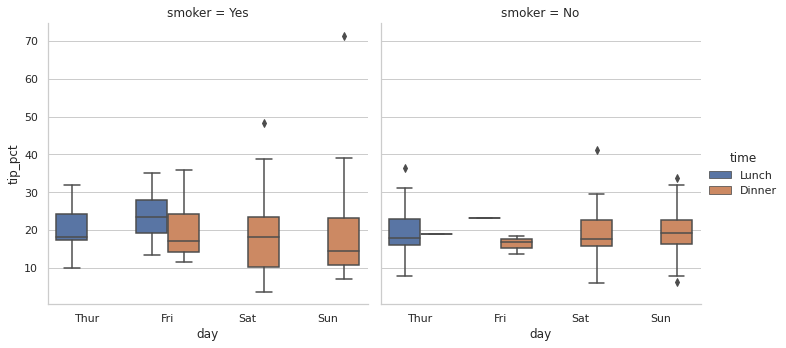

In [252]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

Aquí se observan las diferencias en porcentaje de propina que dejan fumadores o no fumadores según el día de la semana y según si es comida o cena.

Parece ser que los que dejan más propina son los fumadores el viernes al mediodia. Vamos a intentar confirmarlo:

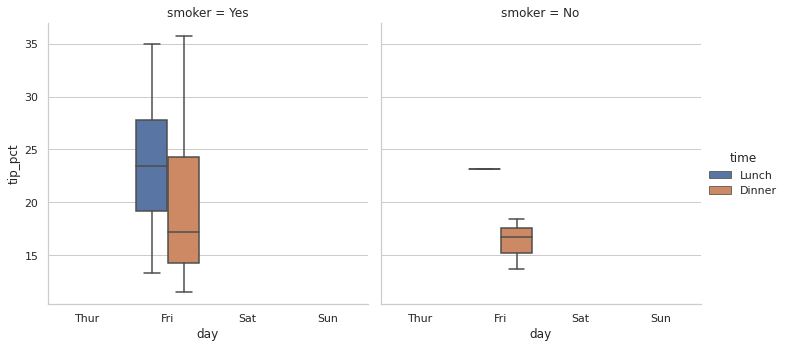

In [253]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[(tips.tip_pct < 245) & (tips.day == 'Fri') ]);

In [254]:

print("La media de % propina para fumadores es la siguiente:",tips[tips.smoker =='Yes'].tip_pct.mean())
print("La media de % propina para no fumadores es la siguiente:",tips[tips.smoker =='No'].tip_pct.mean())

print("La media de % propina para fumadores en viernes es la siguiente:",tips[(tips.smoker =='Yes')&(tips.day == 'Fri')].tip_pct.mean())
print("La media de % propina para no fumadores en viernes es la siguiente:",tips[(tips.smoker =='No')&(tips.day == 'Fri')].tip_pct.mean())

print("La media de % propina para fumadores en viernes/comida es la siguiente:",tips[(tips.smoker =='Yes')&(tips.day == 'Fri')&(tips.time == 'Lunch')].tip_pct.mean())
print("La media de % propina para no fumadores en viernes/comida es la siguiente:",tips[(tips.smoker =='No')&(tips.day == 'Fri')&(tips.time == 'Lunch')].tip_pct.mean())

La media de % propina para fumadores es la siguiente: 21.817741935483884
La media de % propina para no fumadores es la siguiente: 19.223708609271533
La media de % propina para fumadores en viernes es la siguiente: 21.629333333333328
La media de % propina para no fumadores en viernes es la siguiente: 17.975
La media de % propina para fumadores en viernes/comida es la siguiente: 23.691666666666663
La media de % propina para no fumadores en viernes/comida es la siguiente: 23.11


Sí parece confirmarse, por poco, que el porcentaje de propina es mayor en el caso de fumadores en viernes/comida. 

Aunque lo que sí hay diferencia en todos los casos que los fumadores, de media, dejan más propina que los no fumadores.

# Exercici 2 & Exercici 3
---
* Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

* En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [255]:
df = pd.read_csv('./movies.dat',sep="::",names=["Index","Title","Genres"]);

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [256]:
df

,Index,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [257]:
# Limpiamos la 1a columna.
workdf = df.drop('Index',axis=1)

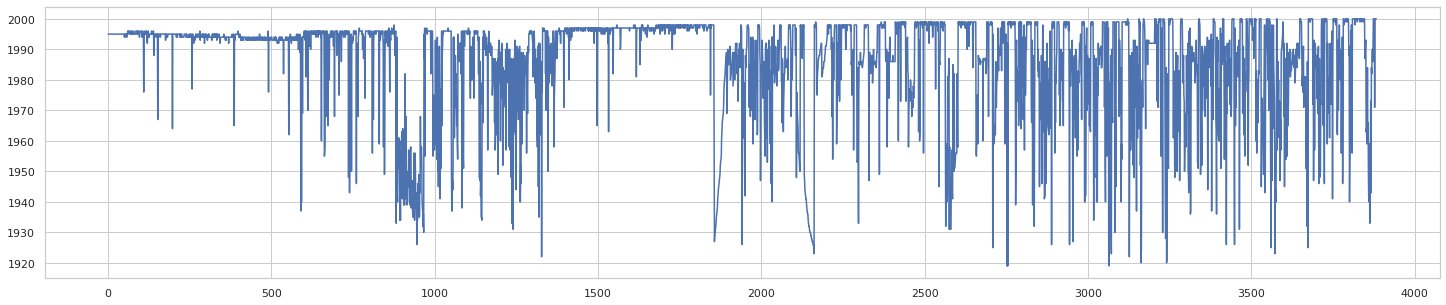

In [258]:
# Extraemos el año del título 
workdf['Year'] =workdf['Title'].str.slice(-5,-1)
# Separamos los géneros.
workdf.Year= workdf.Year.astype('int64')
plt.plot(workdf.Year)

In [259]:
workdf.Year.describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: Year, dtype: float64

In [260]:
# Quitamos el año del título
workdf.Title= workdf.Title.str.slice(0,-6)
workdf

,Title,Genres,Year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


In [261]:
# Descomponemos la columna Genero y generos
# Primero buscamos el item con mayor longitud
workdf.Genres.describe()
workdf.Genres.str.len().max()
lengths = workdf["Genres"].str.len()
argmax = np.where(lengths == lengths.max())[0]
workdf.iloc[argmax]

,Title,Genres,Year
1187,"Transformers: The Movie, The",Action|Animation|Children's|Sci-Fi|Thriller|War,1986


In [262]:
# El item 1205 es el que tiene mayor longitud en la columna "Genres". 
# Hipótesis 1.- Suponemos que el item con mayor longitud será el que tiene más géneros. 
# Luego lo comprobaremos en la última columna generada.

# split(str : Column, pattern : String) : Column

Genresdf = workdf['Genres'].str.split(pat='|', expand=True)
# No es necesario saber cual es el máximo número de géneros en el df, porque la función split
# ya crea automáticamente las columnas necesarias... 

# Concatenamos los 2 df creados, workdf = workdf + Genresdf
workdf = pd.concat([workdf,Genresdf],axis=1)
workdf

,Title,Genres,Year,0,1,2,3,4,5
0,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None,None,None
1,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None,None,None
2,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None
3,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None,None,None
4,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,Comedy,2000,Comedy,None,None,None,None,None
3879,Requiem for a Dream,Drama,2000,Drama,None,None,None,None,None
3880,Tigerland,Drama,2000,Drama,None,None,None,None,None
3881,Two Family House,Drama,2000,Drama,None,None,None,None,None


In [263]:
# Renombramos las columnas.
workdf = workdf.reset_index().rename(columns={0: "Genre0", 1: "Genre1", 2: "Genre2",
                                     3: "Genre3", 4: "Genre4", 5: "Genre5"})

In [264]:
#Observamos los datos que tenemos:
round(workdf.describe(include='all'), 3)

,index,Title,Genres,Year,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5
count,3883.00,3883,3883,3883.000,3883,1858,536,115,15,1
unique,NaN,3841,301,NaN,18,17,15,13,6,1
top,NaN,Hamlet,Drama,NaN,Drama,Drama,Thriller,Thriller,Thriller,War
freq,NaN,5,843,NaN,1176,381,120,40,3,1
mean,1941.00,NaN,NaN,1986.067,NaN,NaN,NaN,NaN,NaN,NaN
std,1121.07,NaN,NaN,16.896,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,NaN,NaN,1919.000,NaN,NaN,NaN,NaN,NaN,NaN
25%,970.50,NaN,NaN,1982.000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1941.00,NaN,NaN,1994.000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2911.50,NaN,NaN,1997.000,NaN,NaN,NaN,NaN,NaN,NaN


Mediante esta información, vemos que tenemos 3841 títulos únicos, de 3883, observemos los valores repetidos.

In [265]:
# Busquemos primero valores nulos (NaN, null) en las columnas Title/Genres/Year
workdf.columns
print("Num nulls en Title:",workdf['Title'].isnull().sum())
print("Num nulls en Genres:",workdf['Genres'].isnull().sum())
print("Num nulls en Year:",workdf['Year'].isnull().sum())

Num nulls en Title: 0
Num nulls en Genres: 0
Num nulls en Year: 0


Ok, vemos que no hay valores nulos, busquemos ahora los valores duplicados en título.

In [266]:
workdf[workdf.duplicated(subset=['Title'],keep=False)]

,index,Title,Genres,Year,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5
6,6,Sabrina,Comedy|Romance,1995,Comedy,Romance,None,None,None,None
25,25,Othello,Drama,1995,Drama,None,None,None,None,None
72,72,"Mis�rables, Les",Drama|Musical,1995,Drama,Musical,None,None,None,None
189,189,"Scarlet Letter, The",Drama,1995,Drama,None,None,None,None,None
274,274,Miracle on 34th Street,Drama,1994,Drama,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3753,3753,Wonderland,Drama,1999,Drama,None,None,None,None,None
3864,3864,Kronos,Sci-Fi,1957,Sci-Fi,None,None,None,None,None
3865,3865,Kronos,Horror,1973,Horror,None,None,None,None,None
3876,3876,Get Carter,Action|Drama|Thriller,2000,Action,Drama,Thriller,None,None,None


Observamos que los que parecen valores repetidos, parecen ser películas que se han vuelto a hacer con el paso del tiempo. No será necesario eliminarlas.

In [267]:
#Comprobamos que los valores duplicados tienen año diferente:
repeateddf = workdf[workdf.duplicated(subset=['Title'],keep=False)]
concatdf = repeateddf.loc[:,'Title']+repeateddf.loc[:,'Year'].astype('str')
# Concatenamos los 2 df creados, workdf = workdf + Genresdf
repeateddf = pd.concat([repeateddf,concatdf],axis=1)
# Renombramos las columnas.
repeateddf = repeateddf.reset_index().rename(columns={0: "concat"})
#Observamos el Dataframe
repeateddf.sort_values('concat')

,level_0,index,Title,Genres,Year,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,concat
30,2016,2016,101 Dalmatians,Animation|Children's,1961,Animation,Children's,None,None,None,None,101 Dalmatians 1961
19,1346,1346,101 Dalmatians,Children's|Comedy,1996,Children's,Comedy,None,None,None,None,101 Dalmatians 1996
9,843,843,"Ballad of Narayama, The (Narayama Bushiko)",Drama,1958,Drama,None,None,None,None,None,"Ballad of Narayama, The (Narayama Bushiko) 1958"
46,2443,2443,"Ballad of Narayama, The (Narayama Bushiko)",Drama,1982,Drama,None,None,None,None,None,"Ballad of Narayama, The (Narayama Bushiko) 1982"
18,1323,1323,Cape Fear,Film-Noir|Thriller,1962,Film-Noir,Thriller,None,None,None,None,Cape Fear 1962
...,...,...,...,...,...,...,...,...,...,...,...,...
50,2492,2492,True Crime,Crime|Thriller,1999,Crime,Thriller,None,None,None,None,True Crime 1999
48,2484,2484,Village of the Damned,Horror|Sci-Fi|Thriller,1960,Horror,Sci-Fi,Thriller,None,None,None,Village of the Damned 1960
5,328,328,Village of the Damned,Horror|Sci-Fi,1995,Horror,Sci-Fi,None,None,None,None,Village of the Damned 1995
22,1611,1611,Wonderland,Documentary,1997,Documentary,None,None,None,None,None,Wonderland 1997


In [268]:
# Contemos los duplicados en la columna 'concat'
repeateddf[repeateddf.duplicated(subset=['concat'],keep=False)]

,level_0,index,Title,Genres,Year,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5,concat


Ok, hemos confirmado nuestra suposición, que todos los títulos repetidos están hechos en años diferentes, por lo que son un remake de la película original.

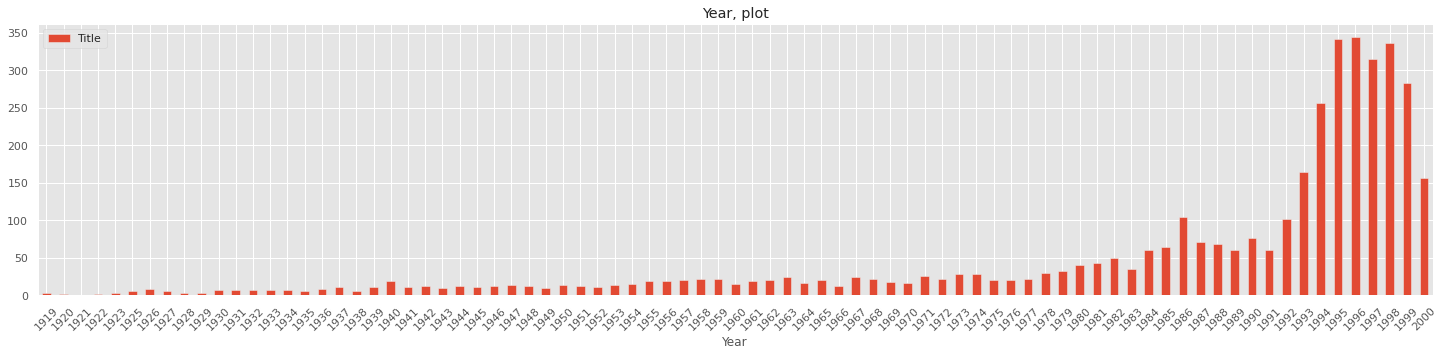

In [269]:
# Make the graphs a bit prettier
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (25, 5)
# Graficamos Núm películas por año
YearCountdf = workdf.groupby('Year').count()

YearCountdf.plot(y='Title',kind='bar')
plt.xticks(rotation=45)
plt.title("Year, plot");


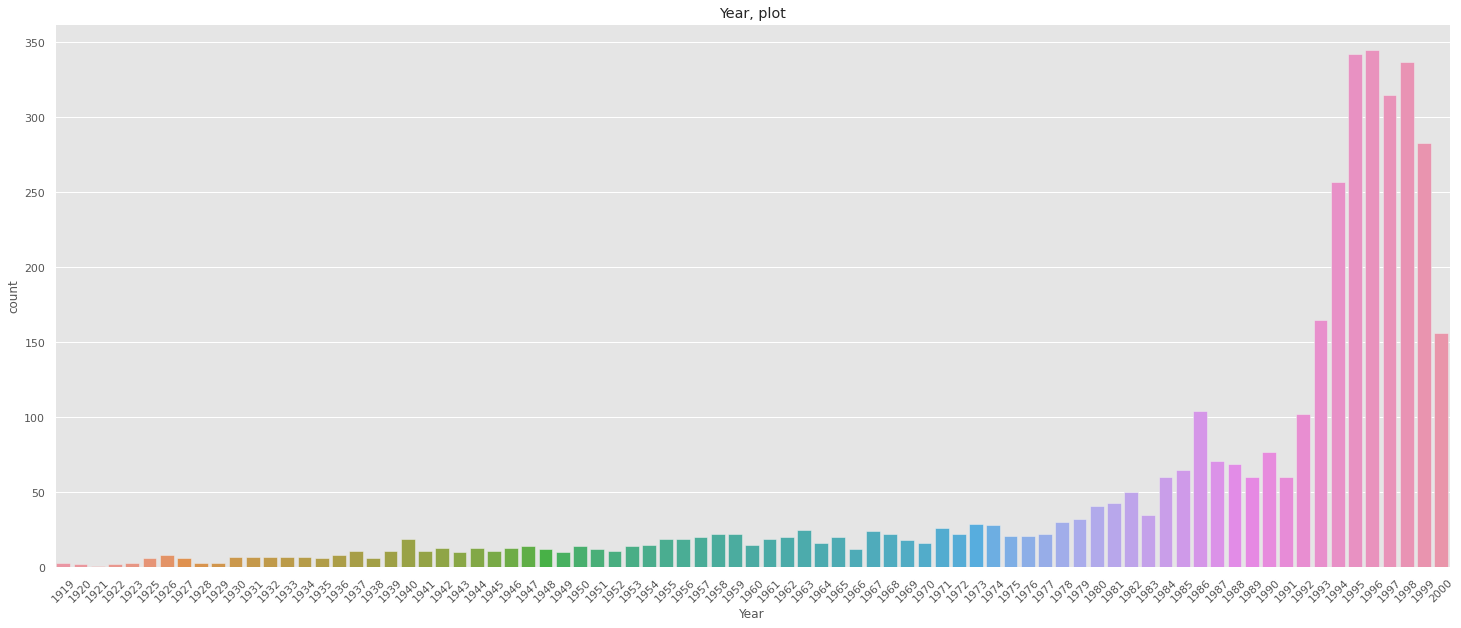

In [270]:
# Las graficamos en Seaborn, más estético.
# load dataset
# Set the figure size
plt.figure(figsize=(25, 10))
# plot a bar chart
sns.countplot(x='Year', data=workdf);
plt.xticks(rotation=45)
plt.title("Year, plot");


Observamos que los últimos 10 años se han hecho muchas más películas que en los anteriores.

In [271]:
print("Películas hechas entre 1990 y 2020 =",YearCountdf['Title'][ YearCountdf.index >= 1990].sum())

Películas hechas entre 1990 y 2020 = 2439


In [272]:
print("Películas hechas antes de 1990  =",YearCountdf['Title'][ YearCountdf.index < 1990].sum())

Películas hechas antes de 1990  = 1444


In [273]:
workdf.head()

,index,Title,Genres,Year,Genre0,Genre1,Genre2,Genre3,Genre4,Genre5
0,0,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None,None,None
1,1,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None,None,None
2,2,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None
3,3,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None,None,None
4,4,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None


Queremos graficamos ahora el conteo de películas de un género según el año, para ver si encontramos alguna relación.

In [274]:
# Primero deberíamos contar el número de películas de cada género en cada año
# GenreCountdf = workdf.groupby('Genre0').count()

S1 = workdf['Genre0'].value_counts()
S2 = workdf['Genre1'].value_counts()
S3 = workdf['Genre2'].value_counts()
S4 = workdf['Genre3'].value_counts()
S5 = workdf['Genre4'].value_counts()
S6 = workdf['Genre5'].value_counts()
# +workdf['Genre1'].value_counts()+ workdf['Genre2'].value_counts()+\
# workdf['Genre3'].value_counts()+workdf['Genre4'].value_counts()
GenresS =S1.add(S2,None,0).add(S3,None,0).add(S4,None,0).add(S5,None,0).add(S6,None,0)
GenresS.sort_values(ascending=False,inplace=True)
GenresS

Drama          1603.0
Comedy         1200.0
Action          503.0
Thriller        492.0
Romance         471.0
Horror          343.0
Adventure       283.0
Sci-Fi          276.0
Children's      251.0
Crime           211.0
War             143.0
Documentary     127.0
Musical         114.0
Mystery         106.0
Animation       105.0
Western          68.0
Fantasy          68.0
Film-Noir        44.0
dtype: float64

In [275]:
df_Genres = pd.DataFrame(GenresS)
df_Genres

,0
Drama,1603.0
Comedy,1200.0
Action,503.0
Thriller,492.0
Romance,471.0
Horror,343.0
Adventure,283.0
Sci-Fi,276.0
Children's,251.0
Crime,211.0


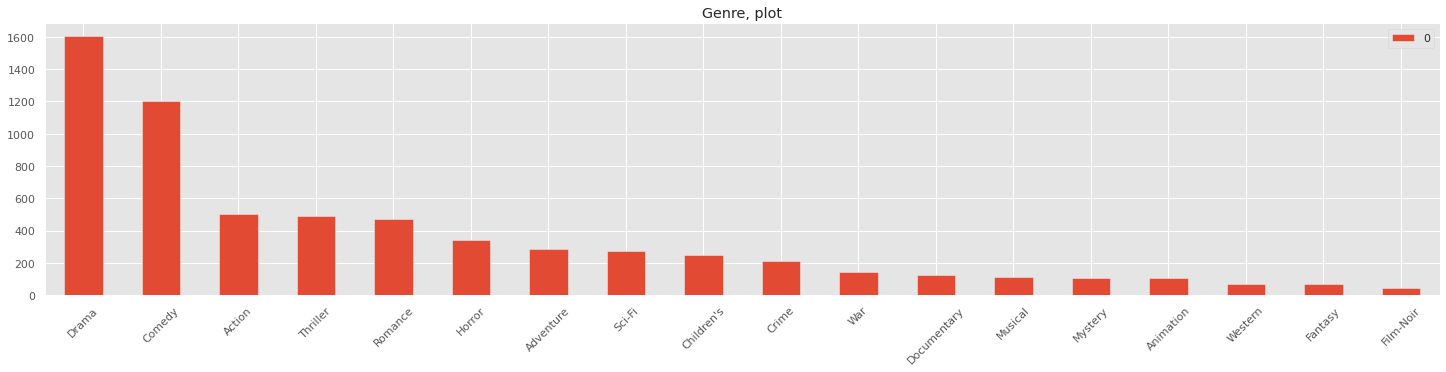

In [276]:
# Lo graficamos.
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (25, 5)
df_Genres.plot(kind='bar');
plt.xticks(rotation=45)
plt.title("Genre, plot");

Observamos que los 2 géneros más comunes en el set de películas es Drama y Comedia. 

El resto de géneros  están a mitad o menos de estos 2. 

El género menos común es "Film-noir"

# Intentemos ahora graficar los géneros por año, para ver si vemos algún patrón.

Vemos que los datos tal como están, son muy difíciles de tratar. 

Vamos a construir un DF con las columnas Title, Year, Genre, duplicando la row de la película tantas veces como géneros tengamos.

In [277]:
# Primero, expandimos los géneros en una lista
newdf = workdf.copy()
# Eliminamos las columnas de Genre0 a Genre5
newdf.drop(columns=['Genre0','Genre1','Genre2','Genre3','Genre4','Genre5'],inplace=True)

newdf    

,index,Title,Genres,Year
0,0,Toy Story,Animation|Children's|Comedy,1995
1,1,Jumanji,Adventure|Children's|Fantasy,1995
2,2,Grumpier Old Men,Comedy|Romance,1995
3,3,Waiting to Exhale,Comedy|Drama,1995
4,4,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3878,Meet the Parents,Comedy,2000
3879,3879,Requiem for a Dream,Drama,2000
3880,3880,Tigerland,Drama,2000
3881,3881,Two Family House,Drama,2000


In [278]:
# Creamos una columna que incluirá una lista de los géneros de esa película
newdf['Genres_split'] = newdf['Genres'].str.split('|')
# Eliminamos las columnas de Genres
newdf.drop(columns='Genres',inplace=True)
newdf

,index,Title,Year,Genres_split
0,0,Toy Story,1995,"[Animation, Children's, Comedy]"
1,1,Jumanji,1995,"[Adventure, Children's, Fantasy]"
2,2,Grumpier Old Men,1995,"[Comedy, Romance]"
3,3,Waiting to Exhale,1995,"[Comedy, Drama]"
4,4,Father of the Bride Part II,1995,[Comedy]
...,...,...,...,...
3878,3878,Meet the Parents,2000,[Comedy]
3879,3879,Requiem for a Dream,2000,[Drama]
3880,3880,Tigerland,2000,[Drama]
3881,3881,Two Family House,2000,[Drama]


In [279]:
# Ahora hacemos explode de la lista Genres_split
newdf = newdf.explode('Genres_split')
newdf

,index,Title,Year,Genres_split
0,0,Toy Story,1995,Animation
0,0,Toy Story,1995,Children's
0,0,Toy Story,1995,Comedy
1,1,Jumanji,1995,Adventure
1,1,Jumanji,1995,Children's
...,...,...,...,...
3879,3879,Requiem for a Dream,2000,Drama
3880,3880,Tigerland,2000,Drama
3881,3881,Two Family House,2000,Drama
3882,3882,"Contender, The",2000,Drama


<Figure size 1800x720 with 0 Axes>

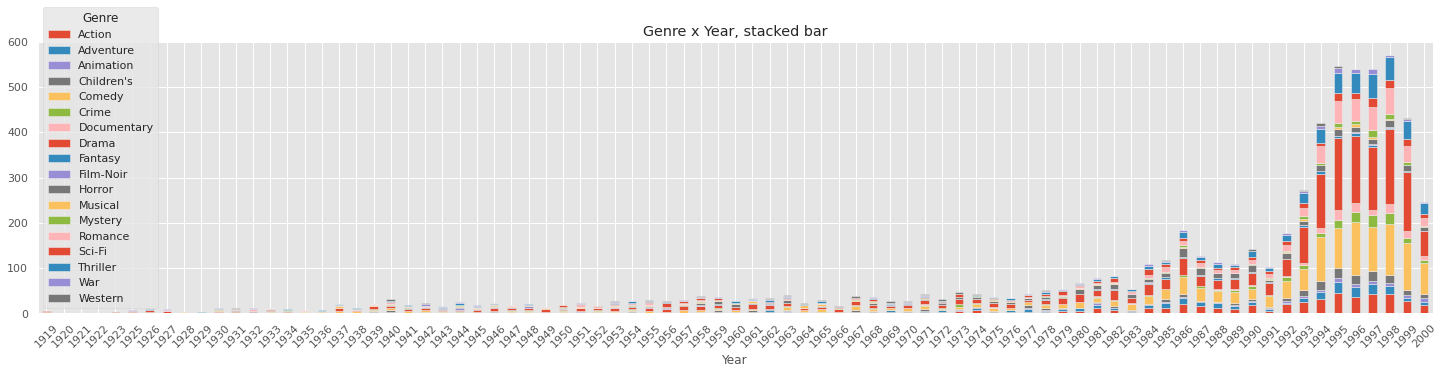

In [280]:
# Ahora renombramos la columna Genres_split 
newdf.rename(columns={'Genres_split':'Genre'},inplace=True)
# Ya podemos graficar un bar stacked de Year por Genre
# Set the figure size
plt.figure(figsize=(25, 10));
# Utilizamos la groupby + pivot para hacer un bar stacked de Géneros.
df_plot = newdf.groupby(['Genre', 'Year']).size().reset_index().pivot(columns='Genre', index='Year', values=0)
df_plot.plot(kind='bar', stacked=True);
plt.xticks(rotation=45);
plt.title("Genre x Year, stacked bar");

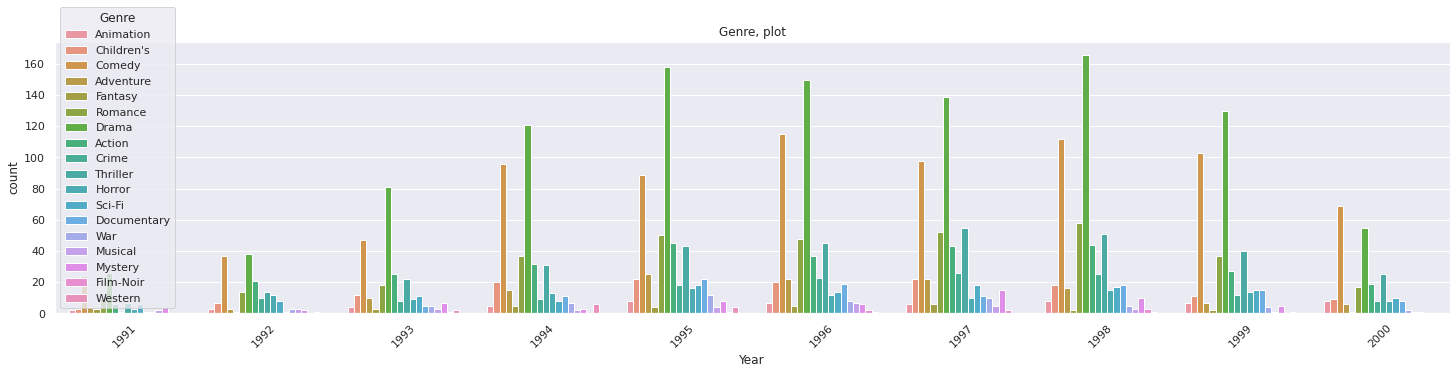

In [281]:
# Observamos todas las películas según su género en los últimos 10 años
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# # plot a bar chart
sns.countplot(x='Year', hue='Genre', data=newdf[newdf.Year>1990]);

plt.xticks(rotation=45)
plt.title("Genre, plot");


Observamos que en los últimos años, los géneros más predominantes son Drama y Comedia, que coinciden con los géneros predominantes desde 1919 hasta 2000. 

En cierta medida es esperable pues la mayoría de las películas se han hecho en los últimos 10 años.

Observemos ahora la distribución de géneros x año, pero de manera porcentual.

In [282]:
# Construimos df que por cada año, nos dé el % de películas en ese género.
df_plot_perc = df_plot.copy(deep=True)
df_plot_perc['Total']=df_plot_perc.iloc[:,:].sum(axis=1)

for column in df_plot_perc:
  df_plot_perc[column]=df_plot_perc[column]/df_plot_perc['Total']*100

# Eliminamos las columnas de Total
df_plot_perc.drop(columns='Total',inplace=True)

In [283]:
df_plot_perc

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,
1919,20.000000,20.000000,NaN,NaN,20.000000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,66.666667,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,6.839187,4.066543,1.293900,3.696858,21.256932,4.251386,3.512015,27.726433,0.924214,0.369686,2.218115,1.293900,1.109057,8.872458,2.587800,8.317930,1.478743,0.184843
1997,7.962963,4.074074,1.111111,4.074074,18.148148,4.814815,2.037037,25.740741,1.111111,0.370370,1.851852,0.925926,2.777778,9.629630,3.333333,10.185185,1.851852,NaN
1998,7.692308,2.797203,1.398601,3.146853,19.580420,4.370629,3.146853,29.020979,0.349650,0.524476,2.622378,0.524476,1.748252,10.139860,2.972028,8.916084,0.874126,0.174825


<Figure size 1800x720 with 0 Axes>

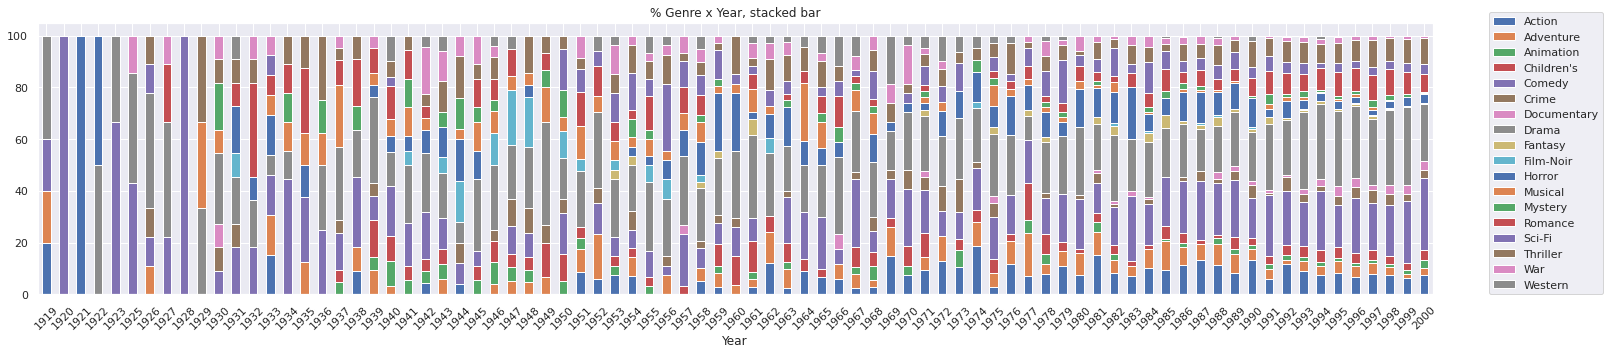

In [284]:
# Ya podemos graficar un bar stacked porcentual de Year por Genre
# Set the figure size
plt.figure(figsize=(25, 10));
df_plot_perc.plot(kind='bar', stacked=True);
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0);
plt.title("% Genre x Year, stacked bar");

<Figure size 1800x720 with 0 Axes>

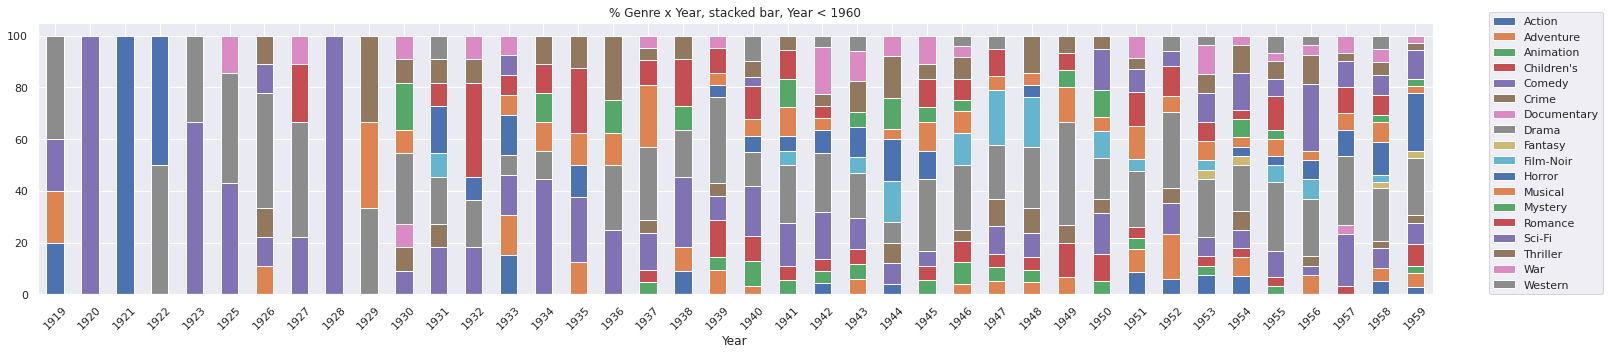

In [285]:
# Troceamos el gráfico en 2:
# Set the figure size
plt.figure(figsize=(25, 10));
df_plot_perc[df_plot_perc.index <1960].plot(kind='bar', stacked=True);
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0);
plt.title("% Genre x Year, stacked bar, Year < 1960");

<Figure size 1800x720 with 0 Axes>

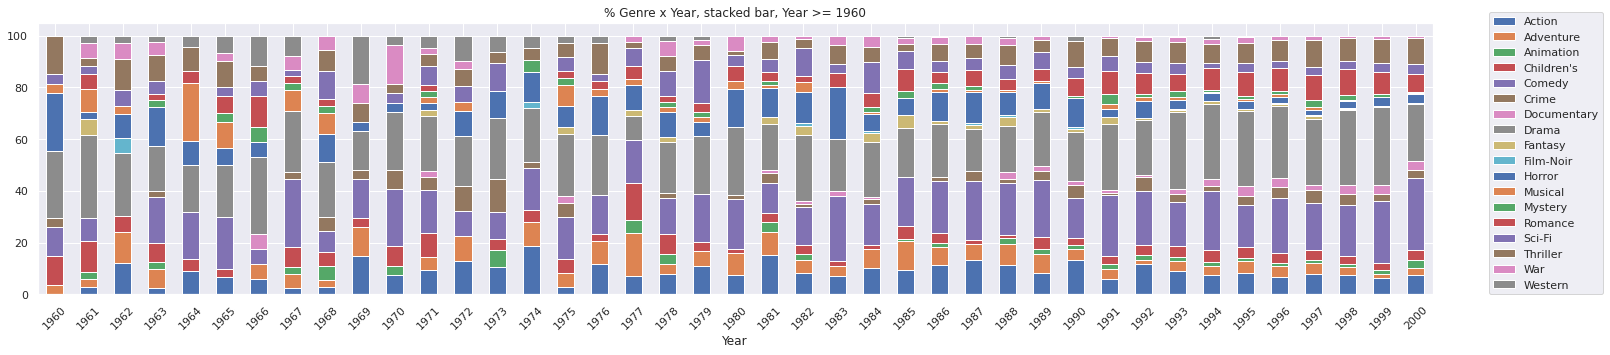

In [286]:
# Troceamos el gráfico en 2:
# Set the figure size
plt.figure(figsize=(25, 10));
df_plot_perc[df_plot_perc.index >= 1960].plot(kind='bar', stacked=True);
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0);
plt.title("% Genre x Year, stacked bar, Year >= 1960");

Parece observarse una disminución del género comedia tras la 2a guerra mundial (1939 - 1945) y un incremento del género drama. Vamos a confirmarlo con gráficos individuales de ambos géneros.

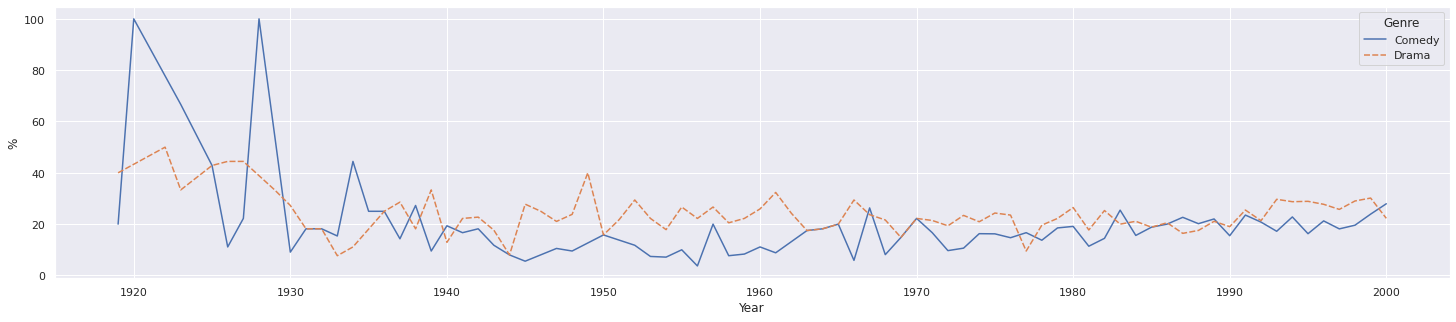

In [287]:
sns.lineplot(data=df_plot_perc.loc[:, ['Comedy','Drama']])
plt.ylabel('%');

Sí que se confirma que durante el periodo 1939 a 1945 disminuyen las películas de género **Comedia** y se incrementan las de **Drama**. Luego el porcentaje de películas de comedia va incrementando hasta estabilizarse a partir finales de los 60's principios 70's.

Grafiquemos ahora el resto de los géneros para ver si observamos patrones:

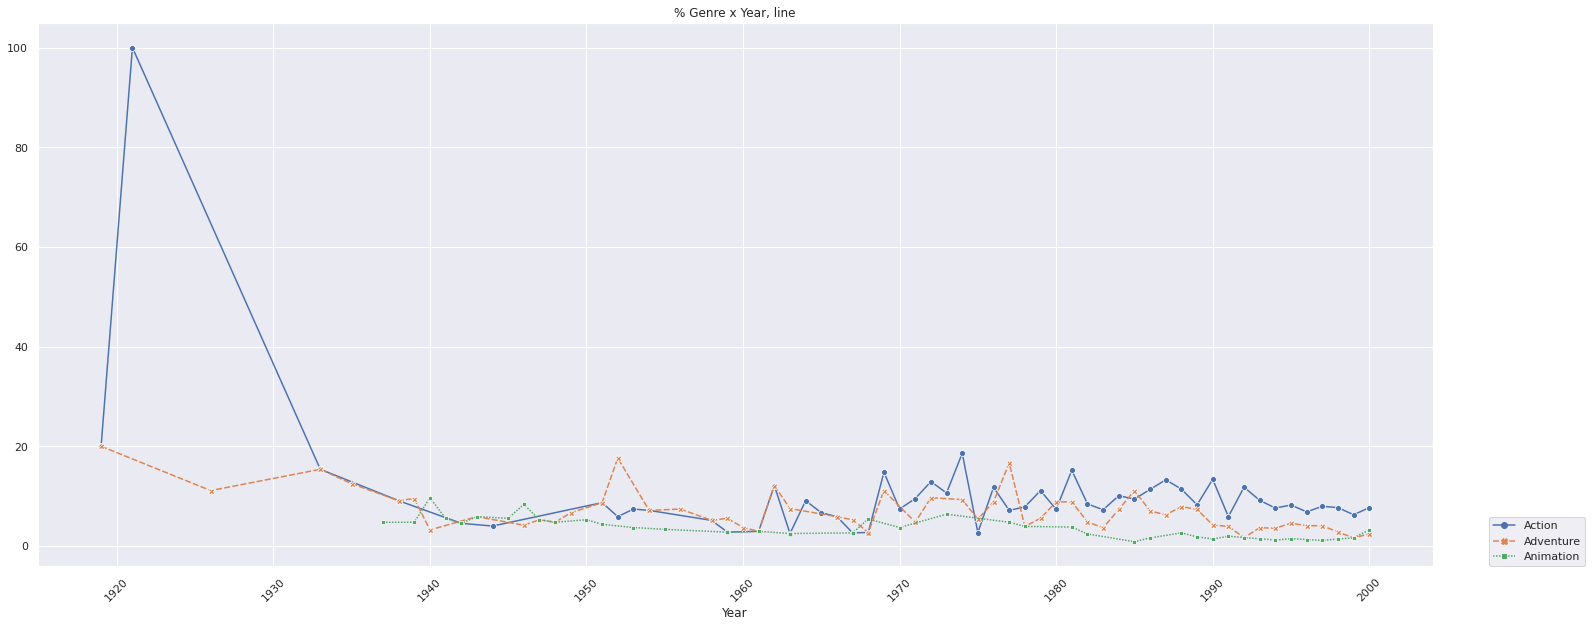

In [288]:
plt.figure(figsize=(25, 10));

sns.lineplot(data=df_plot_perc.loc[:, ['Action','Adventure','Animation']],markers=True)

plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0);
plt.title("% Genre x Year, line");

Los géneros Action, Adventure y Animation, parecen estar estabilizados desde los años 40 hasta 2000 en un porcentaje de unos 10% aprox. (No contamos los años 1919 hasta 1935 porque habían muy pocas películas en esa época).

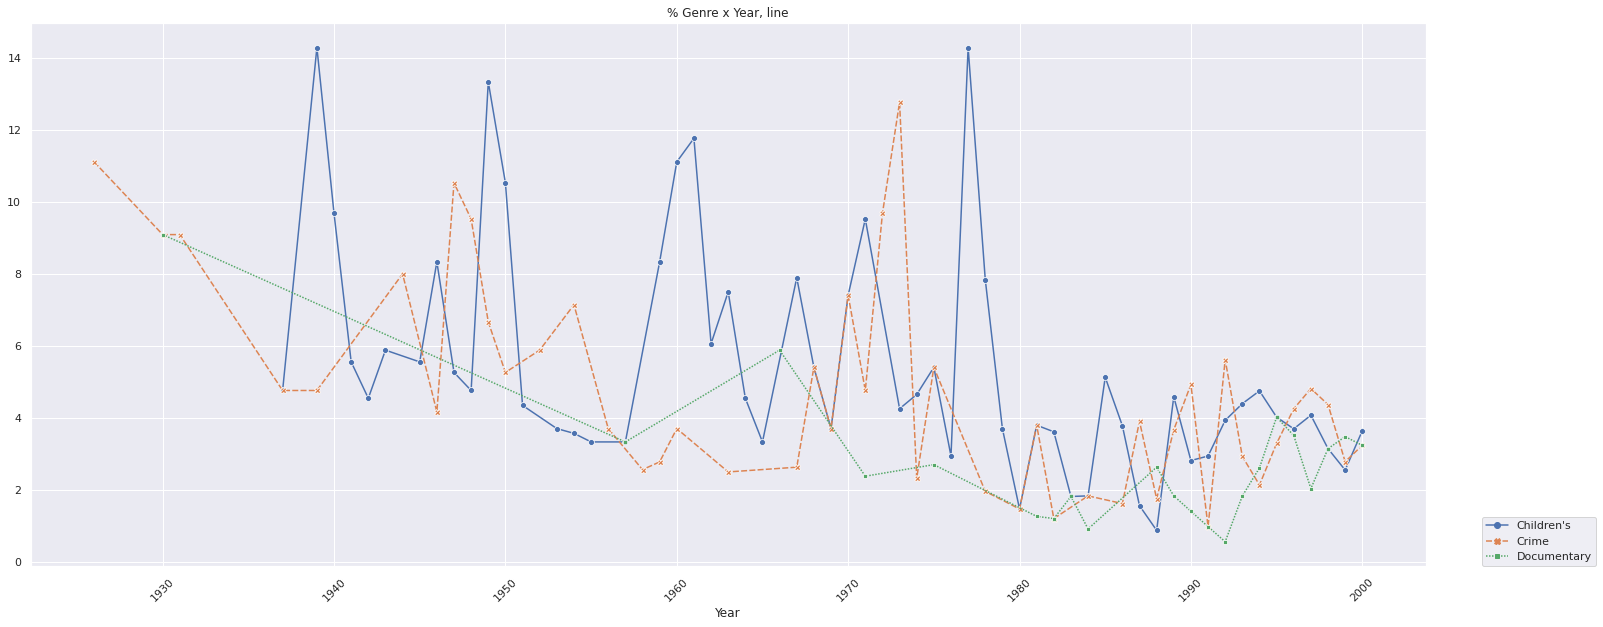

In [289]:
plt.figure(figsize=(25, 10));

sns.lineplot(data=df_plot_perc.loc[:, ['Children\'s','Crime','Documentary']],markers=True)

plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0);
plt.title("% Genre x Year, line");

Los géneros Children's, Crime y Documentary, tambien parecen estar estabilizados desde los años 40 hasta 2000 en un porcentaje de unos 5% aprox. (Más estable en los últimos 20 años, cuando hay más muestras. anteriormente hay picos de hasta 15% pero menos significativos por menor número de muestras)

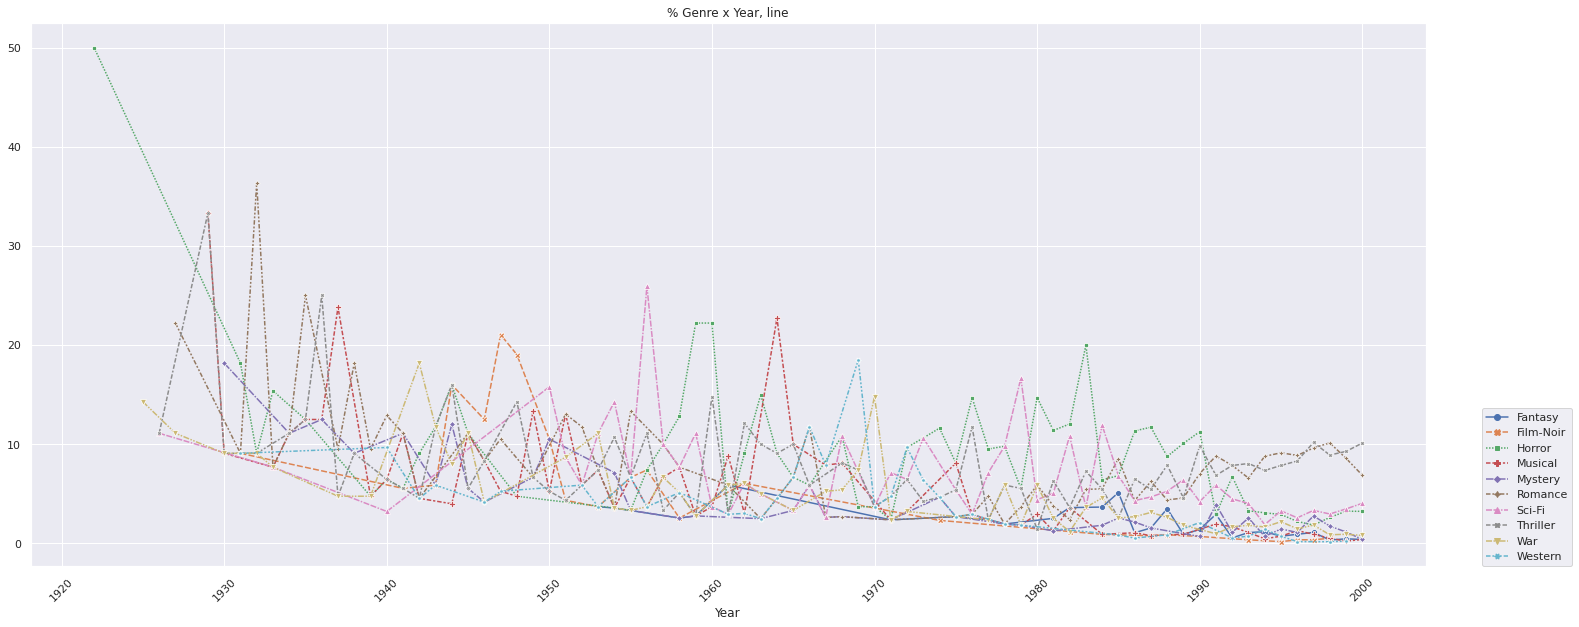

In [290]:
plt.figure(figsize=(25, 10));

sns.lineplot(data=df_plot_perc.loc[:, 'Fantasy':'Western'],markers=True)

plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0);
plt.title("% Genre x Year, line");

Finalmente graficamos el resto de géneros, no se observa patrones importantes en ellos excepto que se suavizan y uniforman las líneas al llegar a mediados de años 80 hasta finales de los 90's.

Finalmente, probaremos a hacer un gráfico de texto para ver las palabras que se repiten en los títulos.

In [291]:
Title_df = workdf[['Year','Title']].copy(deep=True)
Title_df

,Year,Title
0,1995,Toy Story
1,1995,Jumanji
2,1995,Grumpier Old Men
3,1995,Waiting to Exhale
4,1995,Father of the Bride Part II
...,...,...
3878,2000,Meet the Parents
3879,2000,Requiem for a Dream
3880,2000,Tigerland
3881,2000,Two Family House


In [292]:
# Creamos una columna que incluirá una lista de las palabras del título de esa película
Title_df['Title_split'] = Title_df['Title'].str.split(' ')
Title_df

,Year,Title,Title_split
0,1995,Toy Story,"[Toy, Story, ]"
1,1995,Jumanji,"[Jumanji, ]"
2,1995,Grumpier Old Men,"[Grumpier, Old, Men, ]"
3,1995,Waiting to Exhale,"[Waiting, to, Exhale, ]"
4,1995,Father of the Bride Part II,"[Father, of, the, Bride, Part, II, ]"
...,...,...,...
3878,2000,Meet the Parents,"[Meet, the, Parents, ]"
3879,2000,Requiem for a Dream,"[Requiem, for, a, Dream, ]"
3880,2000,Tigerland,"[Tigerland, ]"
3881,2000,Two Family House,"[Two, Family, House, ]"


In [293]:
# Ahora hacemos explode de la lista Title_split
Title_df = Title_df.explode('Title_split')
# Ahora renombramos la columna Title_split 
Title_df.rename(columns={'Title_split':'Title_words'},inplace=True)
Title_df

,Year,Title,Title_words
0,1995,Toy Story,Toy
0,1995,Toy Story,Story
0,1995,Toy Story,
1,1995,Jumanji,Jumanji
1,1995,Jumanji,
...,...,...,...
3881,2000,Two Family House,House
3881,2000,Two Family House,
3882,2000,"Contender, The","Contender,"
3882,2000,"Contender, The",The


In [345]:
# Contamos el número de palabras repetidas en el título
CountTitle = Title_df['Title_words'].value_counts()
print(type(CountTitle))
# Eliminamos palabras no significativas
CountTitle.drop(['The','the','of','in','A','and','to','a','I','&','In','My','for','on'],inplace=True)

<class 'pandas.core.series.Series'>


(-0.5, 399.5, 199.5, -0.5)

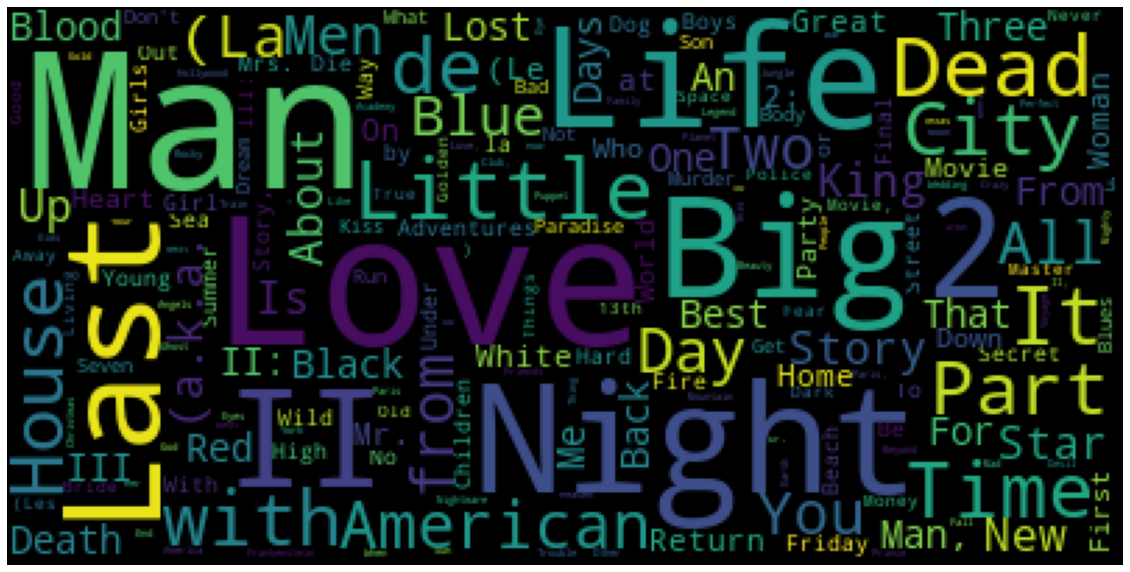

In [346]:
# Ya podemos hacer un gráfico de palabras más repetidas

# Utilizamos Word cloud ☁️
from wordcloud import WordCloud # Generate word cloud
text = CountTitle.to_dict()
wc = WordCloud().generate_from_frequencies(text)

plt.figure(figsize=(20, 30))
plt.imshow(wc)
plt.axis("off") 

Observamos que las palabras más repetidas son: Love, Man, Night, Life, Big.

También son muy frecuentes II o 2, por lo que se vuelve a confirmar que hay muchos remakes.

Man es muy frecuente, y en cambio Woman no aparece, posible sesgo de género.

American aparece como palabra bastante frecuente, por lo que estamos en un dataset de películas americanas.

Big, Man, Night, Life, son buenas palabras tipo para construir títulos de películas.